# LDA Topic Modeling


In [25]:
import nltk
import json
import string
import gensim
import matplotlib.pyplot as plt



from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import cluster

# Pré-traitement

In [8]:
def get_text(file):
  """
  Extraire le texte intégrale de la décision 
  """
  with open(file, 'r') as f:
    data = json.load(f)

  return [data["text"]]

data = list()
data.append(get_text("data.json"))
data.append(get_text("data1.json"))
data.append(get_text("data2.json"))
data.append(get_text("data3.json"))
data.append(get_text("data4.json"))

In [9]:
# Suppression des ponctuation 
data = ["".join([c for c in list(t) if not (c in list(string.punctuation))]) for t in data]

# Tokenisation
data_quote = [word_tokenize(text) for text in data]

# Lemmatisation
lem = WordNetLemmatizer()
data_lm = [[lem.lemmatize(word) for word in t] for t in data_quote]

# Stopwords
stop_words = stopwords.words("french")
data_sw = [[word for word in text if word not in stop_words] for text in data_lm]
print(data_sw)


[['CIV', '.', '2', 'CM', 'COUR', 'DE', 'CASSATION', '______________________', 'Audience', 'publique', '27', 'mai', '2021', 'Cassation', 'partielle', 'sans', 'renvoi', 'M.', 'PIREYRE', ',', 'prÃ©sident', 'ArrÃªt', 'nÂ°', '476', 'FS-P+R', 'Pourvoi', 'nÂ°', 'U', '19-23.898', 'R', 'Ã‰', 'P', 'U', 'B', 'L', 'I', 'Q', 'U', 'E', 'F', 'R', 'A', 'N', 'Ã‡', 'A', 'I', 'S', 'E', '_________________________', 'AU', 'NOM', 'DU', 'PEUPLE', 'FRANÃ‡AIS', '_________________________', 'ARRÃŠT', 'DE', 'LA', 'COUR', 'DE', 'CASSATION', ',', 'DEUXIÃˆME', 'CHAMBRE', 'CIVILE', ',', 'DU', '27', 'MAI', '2021', 'M.', '[', 'T', ']', '[', 'O', ']', ',', 'domiciliÃ©', 'lieudit', '[', 'Adresse', '1', ']', ',', 'a', 'formÃ©', 'pourvoi', 'nÂ°', 'U', '19-23.898', 'contre', 'jugement', 'rendu', '5', 'septembre', '2019', 'tribunal', "d'instance", 'Vannes', ',', 'litige', "l'opposant", ':', '1Â°/', 'Ã', 'M.', '[', 'A', ']', '[', 'E', ']', ',', '2Â°/', 'Ã', 'Mme', '[', 'K', ']', '[', 'W', ']', ',', 'Ã©pouse', '[', 'E', ']', 

In [10]:

# On remarque beaucoup de lettre à 1 caractère, des suites d'underscores et de chiffres, on les enlève 
data_sw = [[word for word in text if len(word) >= 3] for text in data_sw]
data_sw = [[word for word in text if not word.isdigit()] for text in data_sw]
data_sw = [[word for word in text if not "__" in word] for text in data_sw]
print(data_sw)

[['CIV', 'COUR', 'CASSATION', 'Audience', 'publique', 'mai', 'Cassation', 'partielle', 'sans', 'renvoi', 'PIREYRE', 'prÃ©sident', 'ArrÃªt', 'nÂ°', 'FS-P+R', 'Pourvoi', 'nÂ°', '19-23.898', 'NOM', 'PEUPLE', 'FRANÃ‡AIS', 'ARRÃŠT', 'COUR', 'CASSATION', 'DEUXIÃˆME', 'CHAMBRE', 'CIVILE', 'MAI', 'domiciliÃ©', 'lieudit', 'Adresse', 'formÃ©', 'pourvoi', 'nÂ°', '19-23.898', 'contre', 'jugement', 'rendu', 'septembre', 'tribunal', "d'instance", 'Vannes', 'litige', "l'opposant", '1Â°/', '2Â°/', 'Mme', 'Ã©pouse', 'tous', 'deux', 'domiciliÃ©s', 'lieudit', 'Adresse', 'dÃ©fendeurs', 'cassation', 'Partie', 'intervenante', "l'ordre", 'avocats', 'conseil', 'Ã‰tat', 'Cour', 'cassation', 'dont', 'siÃ¨ge', 'Adresse', 'demandeur', 'invoque', "l'appui", 'pourvoi', 'moyen', 'unique', 'cassation', 'annexÃ©', 'prÃ©sent', 'arrÃªt', 'dossier', 'Ã©tÃ©', 'communiquÃ©', 'procureur', 'gÃ©nÃ©ral', 'Sur', 'rapport', 'Besson', 'conseiller', 'observation', 'SCP', 'Bernard', 'HÃ©mery', 'Carole', 'Thomas-Raquin', 'Martin', '

# Utilisation de Gensim 

In [16]:
dic = Dictionary(data_sw)
print(dic)

# Bag of word
data_bow = [dic.doc2bow(text) for text in data_sw]

# Technique LDA
lda = LdaModel(corpus=data_bow, id2word=dic,num_topics=3)

doc_topic = lda.get_document_topics(data_bow)
matrice = corpus2csc(doc_topic).T.toarray()
print(matrice) # dans le premier text le seul topic non nul est le 1



Dictionary<1215 unique tokens: ['07-16972', '19-23.898', '1er', '1re', '1Â°/']...>
[[0.99932057 0.         0.        ]
 [0.         0.99924475 0.        ]
 [0.9993965  0.         0.        ]
 [0.20940815 0.         0.79011178]
 [0.26621091 0.         0.73319405]]


# Clustering (Kmeans)

## Indice de silhouette

In [48]:
kmeans = KMeans(n_clusters=3, random_state=10)
k = kmeans.fit_predict(matrice)
print(k)

km = [KMeans(n_clusters=k, random_state=10).fit(matrice) for k in range(2,5)]

scores = [silhouette_score(matrice, m.labels_) for m in km]
cluster_scores = {f"Cluster {i+2}": score for i, score in enumerate(scores)}
print(cluster_scores)

[1 2 1 0 0]
{'Cluster 2': 0.5661679549945701, 'Cluster 3': 0.7700665743549562, 'Cluster 4': 0.39997070528053097}


## Kmeans 

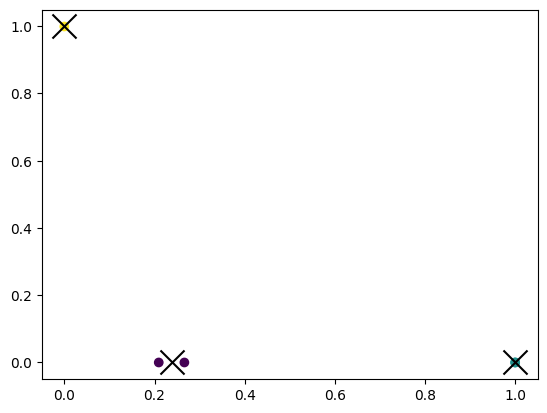

In [49]:
centre = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(matrice[:, 0], matrice[:, 1], c=labels)
plt.scatter(centre[:,0], centre[:,1], s = 300, marker = 'x', c = 'k')
plt.show()